# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Data Load 

In [3]:
# Load the data
data = pd.read_csv('iris_dataset.csv')
# Check the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Data review

We can cluster the data either by the Petal or the Sepal dimensions. In this case, we are going to use the Sepal length and width.

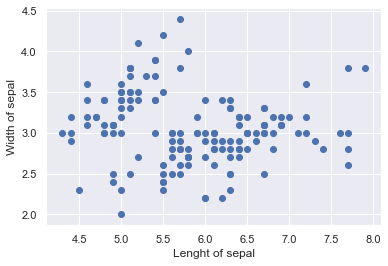

In [4]:
# Create a scatter plot based on two corresponding features.
plt.scatter(data['sepal_length'],data['sepal_width'])
# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Clustering the Data

First, we are going to cluster the data in two separate clusters, and review the results.

In [8]:
# Create a variable which will contain the data for the clustering
x = data.copy()
# Create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Second, We will create a copy of the data. This is done so we can cluster the information next to the original data.

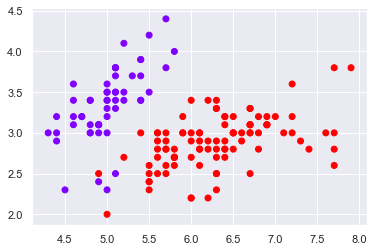

In [10]:
# Create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# Predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)
#Scarer plot based on the sepal features
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

Since the goal of clustering is to maximize the similarity of the observations within a cluster, we are going to standardize to anlyse the clusters.

In [11]:
# Import preprocessing module
from sklearn import preprocessing

# Scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering the standardized data

In [12]:
# Create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# Fit the data
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

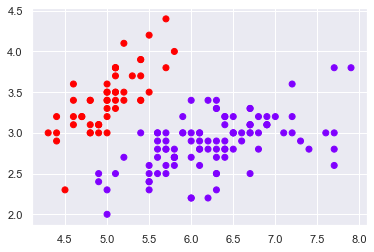

In [14]:
# Create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# Predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
# Scarer plot based on the sepal features
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

## Optimal Number of Clusters

### Within-Cluster Sum of Squares (WCSS)

WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distances between different clusters and within clusters, thus providing us with a rule for deciding the appropriate number of clusters.

In [26]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.61550694959809,
 91.19197002146466,
 80.16566642392938,
 70.90458524592049,
 62.82559901180454,
 56.04184469921732]

### Elbow Method

Plotting the WCSS we can determine the optimal number of clusters.

Text(0, 0.5, 'Within-cluster Sum of Squares')

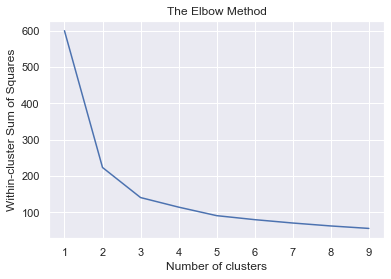

In [27]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve, 2, 3 or 5 seem the most likely number of clusters.

## K Testing

From the Elbow Start by seperating the standardized data into 2 clusters.

### 2 Clusters Analysis

In [29]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Construct a scatter plot of the original data using the standartized clusters.

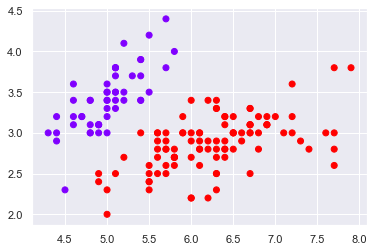

In [32]:
# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)
#Plot
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')

### 3 Clusters Analysis

In [36]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

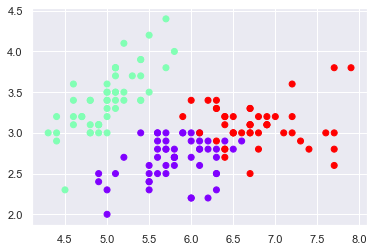

In [37]:
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

### 5 Clusters Analysis

In [47]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

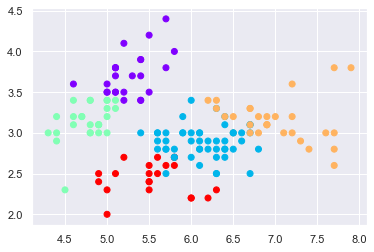

In [48]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')

## Comparing the Solution with the Orinal Data

From the original dataset we see that there are only 3 species of Iris. The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [49]:
real_data = pd.read_csv('iris_with_answers.csv')
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Next, we reorganize the data for analysis and convenience.

In [50]:
# We use the map function to change the species to numebers to analyse correctly
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Plots

#### Real Data

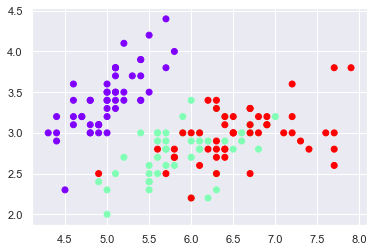

In [51]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

#### Clustering Solution

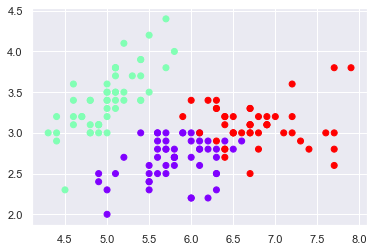

In [52]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

## Final Comments

<li> From the previous analysis we can see that the Elbow method is not 100 percent relaible.</li>
<li> The k-mean is very useful in moments where we already know the number of clusters. In this case: 3, as we saw in the plot with the real data.</li>